# Analysis of Yelp Data


The Yelp dataset is a collection of user-generated reviews and associated data for businesses in various cities. The data includes information such as the business name, category, location, and rating, as well as the user ID and review text for each review. This data can be used to analyze patterns and trends in consumer behavior, business performance, and geographic locations. Additionally, the dataset provides an opportunity to explore the relationships between different variables, such as ratings, reviews, and business categories. This data can be leveraged to gain insights and make informed decisions in a variety of industries, including marketing, business management, and public policy.

Description of the variables of the data used here.

* __business_id__ - A unique identifier for each business in the dataset
* __business_categories__ - A list of categories associated with the business
* __business_city__ - The city where the business is located.
* __user_id__ - A unique identifier for each user who has written a review.
* __text__ - The text of the review.
* __stars__ - The user's rating towards the business
* __useful__ - The number of times the review was voted as useful.
* __date__ - The date the review was posted.

 # Q1. Check and remove missing data
 
### Q1.1 Write a Python code snippet that checks for missing values in each column of the dataset. If any, only display the names of the columns with missing values and their corresponding number of missing values. Print the length of the data before removing the missing data.

Note: Only output the number of missing values for the columns having at least one missing value!

In [1]:
# your code and solutions

# Import packages and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Read the dataset file
yelp = pd.read_csv('../Yelp_Portfolio1_Input.csv')

# Display columns with missing values and their number of missing values
null_check = yelp.isnull().sum()
null_col_val = null_check[null_check != 0]
print(null_col_val)

# The length of the data before removing the missing data
print("The length of data before removing the missing data: " + str(len(yelp)))

business_categories    777
text                     6
dtype: int64
The length of data before removing the missing data: 229907


### Q1.2 Remove any row that contains at least one missing value, and output the length of the resulting cleaned dataset; After that, remove any row that contain invalid value with either "#NAME?" or "#VALUE!" in the `business_id` and `user_id` columns, and output the length of the resulting cleaned dataset.

In [2]:
# your code and solutions

# Remove rows with missing value and output the length of the cleaned data
null_free_yelp = yelp.dropna()
print("The length of dataset after removing missing value: " + str(len(null_free_yelp)))

# Create dataframes for business_id and user_id with either "#NAME?" or "#VALUE!" and assign a variable to each of them
bi_invalid_name = (null_free_yelp['business_id'] == "#NAME?")
bi_invalid_value = (null_free_yelp['business_id'] == "#VALUE!")
ui_invalid_name = (null_free_yelp['user_id'] == "#NAME?")
ui_invalid_value = (null_free_yelp['user_id'] == "#VALUE!")

# Remove the rows that contain invalid value
clean_yelp = null_free_yelp.drop(null_free_yelp.index[bi_invalid_name |
                                                      bi_invalid_value |
                                                      ui_invalid_name | 
                                                      ui_invalid_value
                                                     ]
                                )

# The length of the cleaned data
print("The length of dataset after removing '#NAME?' or '#VALUE!': " + str(len(clean_yelp)))

The length of dataset after removing missing value: 229124
The length of dataset after removing '#NAME?' or '#VALUE!': 222759


# Q2. Random Subset Selection of Yelp Businesses by City

Selecting a random subset of cities from the Yelp business dataset and extracting all the rows corresponding to businesses located in those cities can be useful for various purposes. For example, it can be used to 
perform exploratory data analysis on a smaller subset of the dataset, which can be more manageable and faster to process than the entire dataset. Suppose you want to select a random subset of 10 cities from the dataset and extract all the rows that correspond to businesses located in those cities. At last, print the length of the resulting sample data. Write Python code that accomplishes this task.

Note: Use the $random.sample()$ function to select 10 random cities from the list of unique cities. Set the random seed to 42 before selecting the cities!!!

In [3]:
# your code and solutions

# Select the unique city name from the data set
unique_cities = clean_yelp['business_city'].unique()

# Select 10 unique cities and assign a variable that saves all corresponding businesses located in those unique cities. 
import random
random.seed(42)
sample_cities = random.sample(list(unique_cities), 10)
sample_df = clean_yelp[clean_yelp['business_city'].isin(sample_cities)]

# Output the length of the sample
print("The length of sample data: " + str(len(sample_df)))

The length of sample data: 38654


# Q3. Descriptive statistics on the data output from Q2
### Q3.1 Compute summary statistics for the `stars` column of the sample data
Note: the resulting output includes the count, mean, standard deviation, minimum, maximum values of the column.

In [4]:
# your code and solutions

# Output the count, mean, standard deviation, minimum, maximum and quartiles for 'stars'
print(sample_df['stars'].describe())
print("""
There are 38,654 ratings by users in this sample.
The average rating of the businesses in the sample is 3.708 stars.
The standard deviation rating is 1.241.
The minimum and maximum ratings are 1 and 5 stars.
""")

count    38654.000000
mean         3.707922
std          1.240872
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: stars, dtype: float64

There are 38,654 ratings by users in this sample.
The average rating of the businesses in the sample is 3.708 stars.
The standard deviation rating is 1.241.
The minimum and maximum ratings are 1 and 5 stars.



### Q3.2 For each city in the dataframe, how many unique businesses are there?

Note: the resulting dataframe has two columns: `business_city` and `count`. Compute summary statistics (similar as Q 3.1) for the `count` column.

In [5]:
# your code and solutions

# Create a new dataframe to show the number of unique businesses in each business_city
unique_business_df = pd.DataFrame(sample_df.groupby("business_city")['business_categories'].nunique().reset_index(name = 'count'))

# Output the count, mean, standard deviation, minimum, maximum and quartiles for 'count' of unique businesses
print("Total Unique businesses: " + str(unique_business_df['count'].sum()))
print(unique_business_df['count'].describe())
print("""
For the 10 sample cities, there are total 1,082 unique businesses.
In average, there are 108 to 109 unique businesses in each city.
The standard deviation of unique businesses is 165.115.
The minimum and maximum of unique businesses between sample cities are 1 and 502.
""")

Total Unique businesses: 1082
count     10.00000
mean     108.20000
std      165.11464
min        1.00000
25%        6.75000
50%       38.00000
75%       91.50000
max      502.00000
Name: count, dtype: float64

For the 10 sample cities, there are total 1,082 unique businesses.
In average, there are 108 to 109 unique businesses in each city.
The standard deviation of unique businesses is 165.115.
The minimum and maximum of unique businesses between sample cities are 1 and 502.



### Q3.3 For each business category and business ID combination in the dataframe, how many unique users have rated the business?

Note: the resulting dataframe has three columns: `business_categories`, `business_id`, and `count`. Compute summary statistics (similar as Q 3.1) for the `count` column.

In [6]:
# your code and solutions

# Create a new dataframe to show the number of unique users have rated for each business category and business ID combination.
unique_users_df = pd.DataFrame(sample_df.groupby(["business_categories", "business_id"])['user_id'].nunique().reset_index(name = 'count'))

# Output the count, mean, standard deviation, minimum, maximum and quartiles for 'count' of unique users have rated
print("Unique users have rated the business: " + str(unique_users_df['count'].sum()))
print(unique_users_df['count'].describe())
print("""
For each business category and business ID combination, there are 38,653 unique users have rated the business.
In average, there are 18 to 19 unique users have rated for each combination.
The standard deviation of number of unique users have rated is 38.017.
The minimum and maximum number of unique user have rated are 2 and 718.
""")

Unique users have rated the business: 38653
count    2086.000000
mean       18.529722
std        38.016503
min         2.000000
25%         4.000000
50%         6.000000
75%        16.000000
max       718.000000
Name: count, dtype: float64

For each business category and business ID combination, there are 38,653 unique users have rated the business.
In average, there are 18 to 19 unique users have rated for each combination.
The standard deviation of number of unique users have rated is 38.017.
The minimum and maximum number of unique user have rated are 2 and 718.



# Q4. Plotting and Analysis

Explore the distribution of each variable, or the correlation between the `business_city`, `useful`,`business_categories` or `other variables` and the `stars` column in both the cleaned dataset from Q1 and the sampled dataset from Q2. For instance, does some cities tend to provide higher stars than others? Hint: you may use the boxplot function to plot figures for comparison (___Challenge___).
    
You may need to select the most suitable graphic forms for ease of presentation. Most importantly, for each figure or subfigure, please summarise ___what each plot shows___ (i.e. observations and explanations). Finally, you may need to provide an overall summary of the Yelp data.

Analysis and observation are open, and require you to think critically and analyze data to develop your own insights and conclusions. It's important for you to analyze the data, identify patterns, draw your own conclusions, and communicate your findings. This fosters critical thinking skills, ownership of learning, and a deeper understanding of the data.

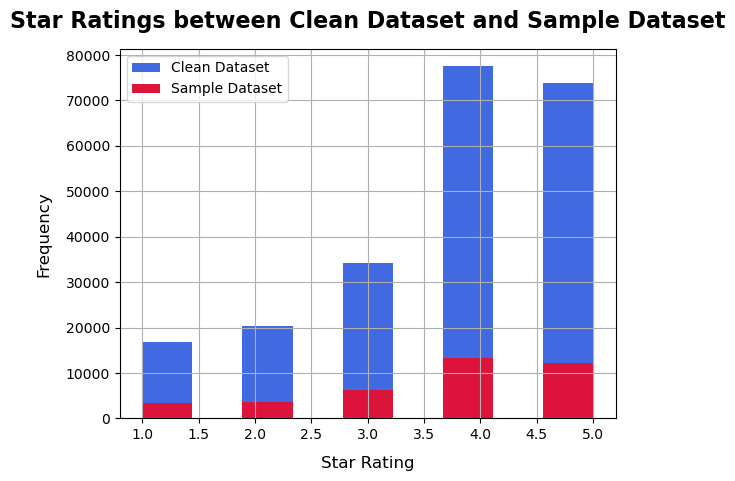

In [7]:
# your code and solutions

# Display histogram of clean and smaple dataset in one graph for exploratory analysis
sample_stars = sample_df['stars']
clean_yelp['stars'].hist(histtype = "stepfilled", color = "royalblue", bins = 9)
sample_stars.hist(histtype = 'stepfilled', color = 'crimson', bins = 9)
plt.xlabel("Star Rating", size = 12, labelpad = 10)
plt.ylabel("Frequency", size = 12, labelpad = 10)
plt.title("Star Ratings between Clean Dataset and Sample Dataset", size = 16, pad = 15, fontweight = "bold")
plt.legend(['Clean Dataset', 'Sample Dataset'], loc = "upper left")
plt.show()

According to the histogram, the distribution of sample dataset star ratings appears to be similar to that of clean dataset.
In general, most of the reviews have 4 to 5 rating where people are satisfied with the services or products provided by the businesses in both datasets.
It can be concluded that the distribution of star rating of the sample dataset can represent the clean dataset, or they follow the same distribution.

           stars    useful
stars   1.000000 -0.063901
useful -0.063901  1.000000


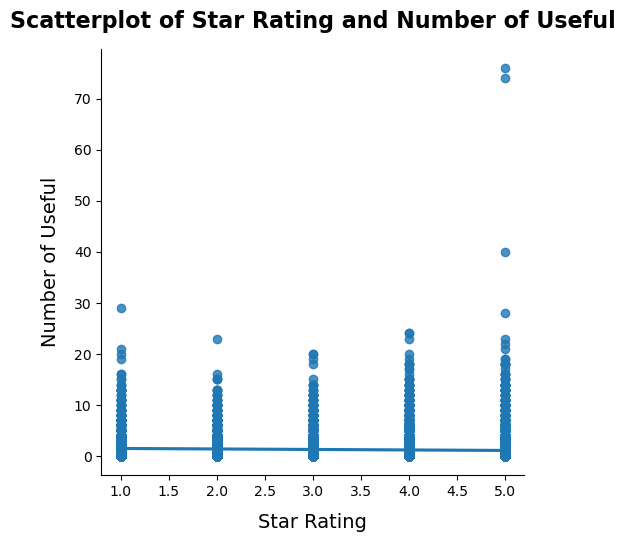

In [8]:
# Display the correlation between 'useful' and 'stars'
print(sample_df.corr())
# Create a scatter plot to explore the relationship between 'useful' and 'stars'
sns.lmplot(x = 'stars', y = 'useful', data = sample_df)
plt.xlabel('Star Rating', size = 14, labelpad = 10)
plt.ylabel('Number of Useful', size = 14, labelpad = 10)
plt.title('Scatterplot of Star Rating and Number of Useful', size = 16, pad = 15, fontweight = 'bold')
plt.show()

According to the scatter plot, the number of useful is spread around 0 to 20 for all level of star ratings. 
It can be observed that the number of useful is not correlated to star ratings. The descriptive statistics of the correlation between 'stars' and 'useful' also shows a very weak negative relationship or nearly no correlation between star rating and number of useful. In the meantime, the scatter plot shows the linear correlation horizontally at a very low number of useful. Users are not actively involved in giving useful most likely because both star ratings and number of useful have a similar purpose that indicates whether the business is good or not. The only difference is giving useful is optional. Therefore, people do not actively participate in giving useful and prefer the way of star rating as a quick indicator.

    business_city  Number of star ratings
0       Ahwatukee                     128
1      Cave Creek                     800
2        Glendale                    7404
3        Goodyear                    1169
4  Grand Junction                       5
5    Saguaro Lake                       5
6        Sun City                     189
7        Surprise                    1386
8           Tempe                   27388
9        Tolleson                     180


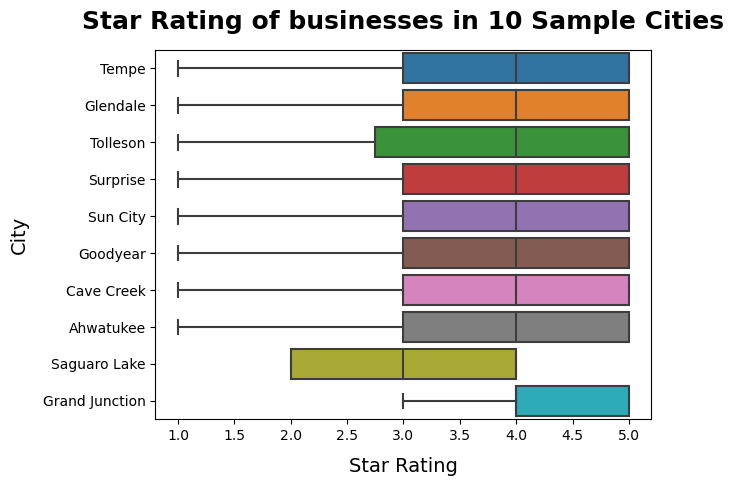

In [9]:
# Create comparative boxplot to see if some cities tend to provide higher stars than others
print(sample_df.groupby('business_city')['stars'].count().reset_index(name = 'Number of star ratings'))
mdf = pd.melt(sample_df, id_vars = ['business_city'], value_vars = ['stars'])
sns.boxplot(x = "value", y = "business_city", data = mdf)
plt.xlabel("Star Rating", size = 14, labelpad = 10)
plt.ylabel("City", size = 14, labelpad = 10)
plt.title("Star Rating of businesses in 10 Sample Cities", size = 18, pad = 15, fontweight = 'bold')
plt.show()

According to the comparative box plot graph "Star Rating of businesses in 10 sample cities", it can be observed that most of the cities have 3 to 5 star ratings.
Only Sagurao Lake and Grand Junction cities have slightly different distribution.
Businesses in Sagurao Lake only have star ratings from 2 to 4, while in Grand Junction most of the star ratings are 4 to 5.
Although Grand Junction seems to provide higher stars than other cities, Grand Junction only have 5 number of star ratings in total. Grand Junction has a relatively low number of star ratings comparing to that in other cities. If there are increased number of star ratings, Grand Junction may also follow the distribution of other cities where most likely having a 3 to 5 star ratings instead of 4 to 5.
Hence, it can be concluded that there is no clear evidence to prove there are cities tend to provide higher stars than others. Most likely the star rating will follow the distribution of 3 to 5 stars when there is enough number of star ratings.

# Summary


Overall, there a lot of information can be generated through Yelp data. Yelp data has a small proportion of missing or misleading data. After cleaning up the Yelp data, it remains lots of complete data for analysis. 10 cities are randomly selected, and all the review information of those cities are extracted from the clean dataset. Sample analysis is carried out based on the extracted review details.

Throughout the analysis, some information is generated. The summary statistics of stars column, unique businesses in each sample city, and unique users have rated the business are obtained. Star ratings between clean dataset and sample dataset are analysed. The distribution of star ratings of sample dataset follows that of clean dataset. Relationship between number of useful and star ratings is analysed. The observation shows there is no relationship between number of useful and star ratings, and users are not actively using the useful function. Lastly, analysis of star ratings between 10 sample cities is carried out. One of the cities seems to have a difference, but it has a low number of star ratings that cannot prove its high star ratings. It is assumed that none of the sample cities tend to provide higher stars than others.